In [1]:
import numpy as np
import re
import nltk  # for text manipulation 
import string 
import warnings 
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
a = np.array([0,12,13])
a[2]

13

In [3]:
test = pd.read_csv('./test_samples.txt')
train = pd.read_csv('./train.txt')

In [4]:
train.columns

Index(['tweet_id', 'sentiment', 'tweet_text'], dtype='object')

In [5]:
print(test.shape)
print(train.shape)

(5398, 2)
(21465, 3)


In [6]:
pd.set_option("display.max_colwidth", 200) 
warnings.filterwarnings("ignore", category=DeprecationWarning) 

%matplotlib inline

In [7]:
train["sentiment"].value_counts()

positive    9064
neutral     9014
negative    3387
Name: sentiment, dtype: int64

In [8]:
train[train['sentiment'] == 'positive'].head(10)

,tweet_id,sentiment,tweet_text
0,264183816548130816,positive,Gas by my house hit $3.39!!!! I\u2019m going to Chapel Hill on Sat. :)
6,264105751826538497,positive,with J Davlar 11th. Main rivals are team Poland. Hopefully we an make it a successful end to a tough week of training tomorrow.
12,263398998675693568,positive,@oluoch @victor_otti @kunjand I just watched it! Sridevi\u2019s comeback.... U remember her from the 90s?? Sun mornings on NTA ;)
13,263650552167157762,positive,One of my best 8th graders Kory was excited after his touchdown today!! He did the victor cruz!!lol http://t.co/tqORFrXB
15,264087629237202944,positive,@MsSheLahY I didnt want to just pop up... but yep we have chapel hill next wednesday you should come.. and shes great ill tell her you asked
18,261954070938537985,positive,@JackStirling serge is amazing... like hes actually a god the lanky sex god... i saw kasabian and noel together in august. it was amazing.
20,263956867787673600,positive,Good Morning Becky ! Thursday is going to be Fantastic ! @SwedenG @DJ4JG @Grdina @Paverlayer @FSBull @RevkahJC @DicksTrash @borderfox116
22,257343699460173824,positive,One ticket left for the @49ers game tomorrow! Don\u2019t miss the rematch of the NFC Championship game against the NY Giants! Hit me up!
29,264041764460036096,positive,Never start working on your dreams and goals tomorrow......tomorrow never comes....if it means anything to U\u002c ACT NOW! #getafterit
30,264102295392882689,positive,@TheFFAddict I had Vick and Flacco\u002c needed an upgrade. Vick may get benched\u002c Jennings a back up again soon. I thought it was a win for me.


In [9]:
train[train['sentiment'] == 'negative'].head(10)

,tweet_id,sentiment,tweet_text
1,263405084770172928,negative,Theo Walcott is still shit\u002c watch Rafa and Johnny deal with him on Saturday.
2,262163168678248449,negative,its not that I\u2019m a GSP fan\u002c i just hate Nick Diaz. can\u2019t wait for february.
3,264249301910310912,negative,Iranian general says Israel\u2019s Iron Dome can\u2019t deal with their missiles (keep talking like that and we may end up finding out)
7,264094586689953794,negative,Talking about ACT\u2019s && SAT\u2019s\u002c deciding where I want to go to college\u002c applying to colleges and everything about college stresses me out.
9,254941790757601280,negative,They may have a SuperBowl in Dallas\u002c but Dallas ain\u2019t winning a SuperBowl. Not with that quarterback and owner. @S4NYC @RasmussenPoll
23,264125591337463808,negative,AFC away fans on Saturday. All this stuff about the \u2019she said no\u2019 chant. It\u2019s bollocks. When he has the ball\u002c just turn your back on him.
24,262350309781823488,negative,My Saturday night has consisted of me watching The Grey with my puppy while my parents throw a rager #whaa #liamneesonisbosstho
25,264259830590603264,negative,Why is it so hard to find the @TVGuideMagazine these days? Went to 3 stores for the Castle cover issue. NONE. Will search again tomorrow...
36,257951107530252289,negative,@MelmurMel @PBandJenelley_1 @vl_delp_ham_ Jenelle lies\u002c1st she said she was alone &the hosp.now she\u2019s saying how weird it was for Keiffer\u2019s
37,263502599699955712,negative,@MyBeautyisBrown LMFAO his big ass get on my nerves\u002c you going to class tomorrow?


In [10]:
train[train['sentiment'] == 'neutral'].head(10)

,tweet_id,sentiment,tweet_text
4,262682041215234048,neutral,Tehran\u002c Mon Amour: Obama Tried to Establish Ties with the Mullahs http://t.co/TZZzrrKa via @PJMedia_com No Barack Obama - Vote Mitt Romney
5,264229576773861376,neutral,I sat through this whole movie just for Harry and Ron at christmas. ohlawd
8,212392538055778304,neutral,"Why is \""""Happy Valentines Day\"""" trending? It\u2019s on the 14th of February not 12th of June smh.."
10,264169034155696130,neutral,Im bringing the monster load of candy tomorrow\u002c I just hope it doesn\u2019t get all squiched
11,263192091700654080,neutral,Apple software\u002c retail chiefs out in overhaul: SAN FRANCISCO Apple Inc CEO Tim Cook on Monday replaced the heads... http://t.co/X49ZEOsG
14,260200142420992000,neutral,#Livewire Nadal confirmed for Mexican Open in February: Rafael Nadal is set to play at the Me... http://t.co/zgUXpcnC #LiveWireAthletics
16,250692636330049538,neutral,@Alyoup005 @addicted2haley hmmmm November is an odd release date if true but if it becomes big enough maybe she could sing it at Grammys
17,263304719471087617,neutral,#Iran US delisting MKO from global terrorists list in line with Iran campaign: Tehran\u002c Oct 30\u002c IRNA -- Secretary... http://t.co/9wWvxEbf
19,260940907082293248,neutral,@HatersgonnHate_ @HAMlikeHussain @Ramythe3lite Larry Bird is ranked 4th all-time not including Lebron or Kobe just sayin...
21,263975113404342273,neutral,Expect light-moderate rains over E. Visayas; Cebu\u002c Bohol\u002c Samar & Leyte have 30-70% chance of rains tonight! Expect fair weather tomorrow!:)


In [11]:
#combining test and train for data cleaning
combi = train.append(test, ignore_index=True) 
combi.shape

(26863, 3)

In [12]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt  

In [13]:
#Removing Twitter Handles (@user)
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweet_text'], "@[\w]*") 
combi.head()

,tweet_id,sentiment,tweet_text,tidy_tweet
0,264183816548130816,positive,Gas by my house hit $3.39!!!! I\u2019m going to Chapel Hill on Sat. :),Gas by my house hit $3.39!!!! I\u2019m going to Chapel Hill on Sat. :)
1,263405084770172928,negative,Theo Walcott is still shit\u002c watch Rafa and Johnny deal with him on Saturday.,Theo Walcott is still shit\u002c watch Rafa and Johnny deal with him on Saturday.
2,262163168678248449,negative,its not that I\u2019m a GSP fan\u002c i just hate Nick Diaz. can\u2019t wait for february.,its not that I\u2019m a GSP fan\u002c i just hate Nick Diaz. can\u2019t wait for february.
3,264249301910310912,negative,Iranian general says Israel\u2019s Iron Dome can\u2019t deal with their missiles (keep talking like that and we may end up finding out),Iranian general says Israel\u2019s Iron Dome can\u2019t deal with their missiles (keep talking like that and we may end up finding out)
4,262682041215234048,neutral,Tehran\u002c Mon Amour: Obama Tried to Establish Ties with the Mullahs http://t.co/TZZzrrKa via @PJMedia_com No Barack Obama - Vote Mitt Romney,Tehran\u002c Mon Amour: Obama Tried to Establish Ties with the Mullahs http://t.co/TZZzrrKa via No Barack Obama - Vote Mitt Romney


In [14]:
#Removing Punctuations, Numbers, and Special Characters
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]", " ") 
combi.head(10)

,tweet_id,sentiment,tweet_text,tidy_tweet
0,264183816548130816,positive,Gas by my house hit $3.39!!!! I\u2019m going to Chapel Hill on Sat. :),Gas by my house hit I u m going to Chapel Hill on Sat
1,263405084770172928,negative,Theo Walcott is still shit\u002c watch Rafa and Johnny deal with him on Saturday.,Theo Walcott is still shit u c watch Rafa and Johnny deal with him on Saturday
2,262163168678248449,negative,its not that I\u2019m a GSP fan\u002c i just hate Nick Diaz. can\u2019t wait for february.,its not that I u m a GSP fan u c i just hate Nick Diaz can u t wait for february
3,264249301910310912,negative,Iranian general says Israel\u2019s Iron Dome can\u2019t deal with their missiles (keep talking like that and we may end up finding out),Iranian general says Israel u s Iron Dome can u t deal with their missiles keep talking like that and we may end up finding out
4,262682041215234048,neutral,Tehran\u002c Mon Amour: Obama Tried to Establish Ties with the Mullahs http://t.co/TZZzrrKa via @PJMedia_com No Barack Obama - Vote Mitt Romney,Tehran u c Mon Amour Obama Tried to Establish Ties with the Mullahs http t co TZZzrrKa via No Barack Obama Vote Mitt Romney
5,264229576773861376,neutral,I sat through this whole movie just for Harry and Ron at christmas. ohlawd,I sat through this whole movie just for Harry and Ron at christmas ohlawd
6,264105751826538497,positive,with J Davlar 11th. Main rivals are team Poland. Hopefully we an make it a successful end to a tough week of training tomorrow.,with J Davlar th Main rivals are team Poland Hopefully we an make it a successful end to a tough week of training tomorrow
7,264094586689953794,negative,Talking about ACT\u2019s && SAT\u2019s\u002c deciding where I want to go to college\u002c applying to colleges and everything about college stresses me out.,Talking about ACT u s SAT u s u c deciding where I want to go to college u c applying to colleges and everything about college stresses me out
8,212392538055778304,neutral,"Why is \""""Happy Valentines Day\"""" trending? It\u2019s on the 14th of February not 12th of June smh..",Why is Happy Valentines Day trending It u s on the th of February not th of June smh
9,254941790757601280,negative,They may have a SuperBowl in Dallas\u002c but Dallas ain\u2019t winning a SuperBowl. Not with that quarterback and owner. @S4NYC @RasmussenPoll,They may have a SuperBowl in Dallas u c but Dallas ain u t winning a SuperBowl Not with that quarterback and owner


In [15]:
#Removing Short Words
combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
combi.head(10)

,tweet_id,sentiment,tweet_text,tidy_tweet
0,264183816548130816,positive,Gas by my house hit $3.39!!!! I\u2019m going to Chapel Hill on Sat. :),house going Chapel Hill
1,263405084770172928,negative,Theo Walcott is still shit\u002c watch Rafa and Johnny deal with him on Saturday.,Theo Walcott still shit watch Rafa Johnny deal with Saturday
2,262163168678248449,negative,its not that I\u2019m a GSP fan\u002c i just hate Nick Diaz. can\u2019t wait for february.,that just hate Nick Diaz wait february
3,264249301910310912,negative,Iranian general says Israel\u2019s Iron Dome can\u2019t deal with their missiles (keep talking like that and we may end up finding out),Iranian general says Israel Iron Dome deal with their missiles keep talking like that finding
4,262682041215234048,neutral,Tehran\u002c Mon Amour: Obama Tried to Establish Ties with the Mullahs http://t.co/TZZzrrKa via @PJMedia_com No Barack Obama - Vote Mitt Romney,Tehran Amour Obama Tried Establish Ties with Mullahs http TZZzrrKa Barack Obama Vote Mitt Romney
5,264229576773861376,neutral,I sat through this whole movie just for Harry and Ron at christmas. ohlawd,through this whole movie just Harry christmas ohlawd
6,264105751826538497,positive,with J Davlar 11th. Main rivals are team Poland. Hopefully we an make it a successful end to a tough week of training tomorrow.,with Davlar Main rivals team Poland Hopefully make successful tough week training tomorrow
7,264094586689953794,negative,Talking about ACT\u2019s && SAT\u2019s\u002c deciding where I want to go to college\u002c applying to colleges and everything about college stresses me out.,Talking about deciding where want college applying colleges everything about college stresses
8,212392538055778304,neutral,"Why is \""""Happy Valentines Day\"""" trending? It\u2019s on the 14th of February not 12th of June smh..",Happy Valentines trending February June
9,254941790757601280,negative,They may have a SuperBowl in Dallas\u002c but Dallas ain\u2019t winning a SuperBowl. Not with that quarterback and owner. @S4NYC @RasmussenPoll,They have SuperBowl Dallas Dallas winning SuperBowl with that quarterback owner


In [16]:
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split()) # tokenizing 
tokenized_tweet.head()

0                                                                                        [house, going, Chapel, Hill]
1                                             [Theo, Walcott, still, shit, watch, Rafa, Johnny, deal, with, Saturday]
2                                                                      [that, just, hate, Nick, Diaz, wait, february]
3       [Iranian, general, says, Israel, Iron, Dome, deal, with, their, missiles, keep, talking, like, that, finding]
4    [Tehran, Amour, Obama, Tried, Establish, Ties, with, Mullahs, http, TZZzrrKa, Barack, Obama, Vote, Mitt, Romney]
Name: tidy_tweet, dtype: object

In [17]:
from nltk.stem.porter import * 
stemmer = PorterStemmer() 
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])    
combi['tidy_tweet'] = tokenized_tweet
combi.head()

,tweet_id,sentiment,tweet_text,tidy_tweet
0,264183816548130816,positive,Gas by my house hit $3.39!!!! I\u2019m going to Chapel Hill on Sat. :),hous go chapel hill
1,263405084770172928,negative,Theo Walcott is still shit\u002c watch Rafa and Johnny deal with him on Saturday.,theo walcott still shit watch rafa johnni deal with saturday
2,262163168678248449,negative,its not that I\u2019m a GSP fan\u002c i just hate Nick Diaz. can\u2019t wait for february.,that just hate nick diaz wait februari
3,264249301910310912,negative,Iranian general says Israel\u2019s Iron Dome can\u2019t deal with their missiles (keep talking like that and we may end up finding out),iranian gener say israel iron dome deal with their missil keep talk like that find
4,262682041215234048,neutral,Tehran\u002c Mon Amour: Obama Tried to Establish Ties with the Mullahs http://t.co/TZZzrrKa via @PJMedia_com No Barack Obama - Vote Mitt Romney,tehran amour obama tri establish tie with mullah http tzzzrrka barack obama vote mitt romney


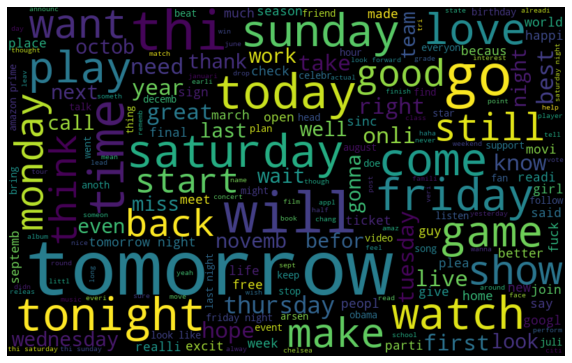

In [18]:
from wordcloud import WordCloud

all_words = ' '.join([text for text in combi['tidy_tweet']])  
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

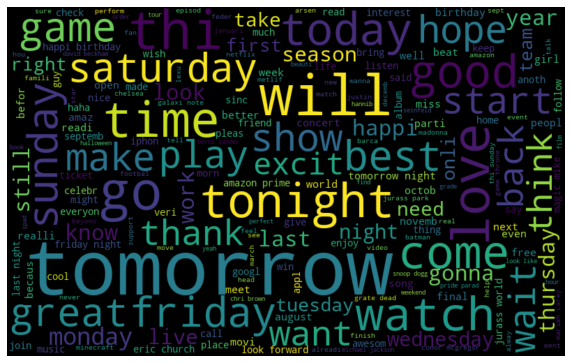

In [19]:
positive_words =' '.join([text for text in combi['tidy_tweet'][combi['sentiment'] == 'positive']]) 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(positive_words) 
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

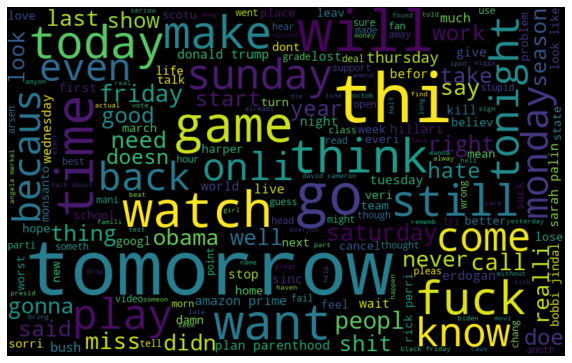

In [20]:
negative_words =' '.join([text for text in combi['tidy_tweet'][combi['sentiment'] == 'negative']]) 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negative_words) 
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

In [21]:
# function to collect hashtags 
def hashtag_extract(x):    
    hashtags = []    
    # Loop over the words in the tweet    
    for i in x:        
        ht = re.findall(r"#(\w+)", i)        
        hashtags.append(ht)     
    return hashtags

In [22]:
# extracting hashtags from positive tweets  
HT_positive = hashtag_extract(combi['tidy_tweet'][combi['sentiment'] == 'positive']) 
# extracting hashtags from negative tweets 
HT_negative = hashtag_extract(combi['tidy_tweet'][combi['sentiment'] == 'negative']) 
# extracting hashtags from neutral tweets 
HT_neutral = hashtag_extract(combi['tidy_tweet'][combi['sentiment'] == 'neutral']) 
# unnesting list 
HT_positive = sum(HT_positive,[]) 
HT_negative = sum(HT_negative,[])
HT_neutral = sum(HT_neutral,[])

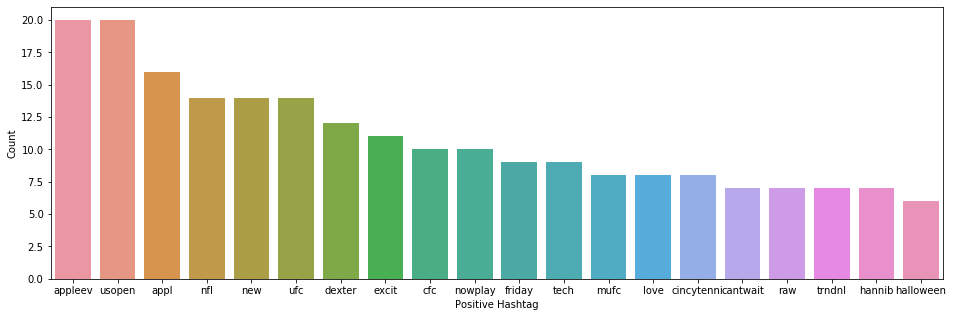

In [23]:
a = nltk.FreqDist(HT_positive)
d = pd.DataFrame({'Hashtag': list(a.keys()), 'Count': list(a.values())}) 
# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
ax.set(xlabel = 'Positive Hashtag')
plt.show()

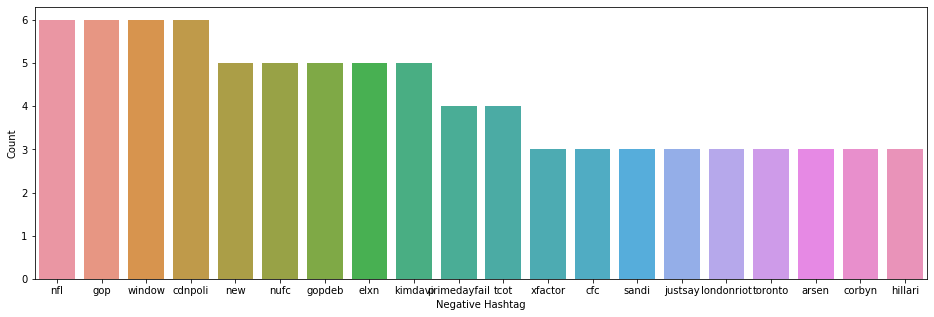

In [24]:
a = nltk.FreqDist(HT_negative)
d = pd.DataFrame({'Hashtag': list(a.keys()), 'Count': list(a.values())}) 
# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
ax.set(xlabel = 'Negative Hashtag')
plt.show()

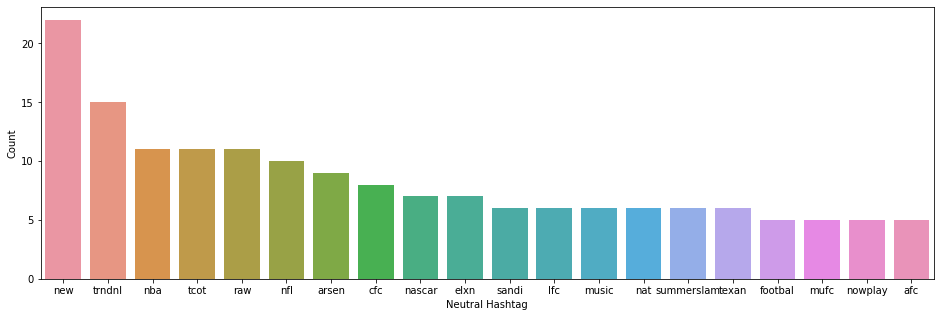

In [25]:
a = nltk.FreqDist(HT_neutral)
d = pd.DataFrame({'Hashtag': list(a.keys()), 'Count': list(a.values())}) 
# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
ax.set(xlabel = 'Neutral Hashtag')
plt.show()

In [26]:
print(combi.shape)
train_split = combi.iloc[:21465,:]
test_split = combi.iloc[21465:,:]
print(train_split.shape)
print(test_split.shape)

(26863, 4)
(21465, 4)
(5398, 4)


In [27]:
#Bag of Words and TF-IDF library imports
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import gensim

In [28]:
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(train_split['tidy_tweet'])
bow.shape

(21465, 1000)

In [29]:
bow_vectorizer.get_feature_names()[:10]

['aaron',
 'abl',
 'absolut',
 'account',
 'action',
 'activ',
 'actual',
 'adam',
 'afternoon',
 'agre']

In [30]:
bow_test = bow_vectorizer.fit_transform(test_split['tidy_tweet'])

In [31]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(train_split['tidy_tweet'])

In [32]:
tfidf.shape

(21465, 1000)

In [33]:
tfidf_test = tfidf_vectorizer.fit_transform(test_split['tidy_tweet'])

In [34]:
# get the first vector out (for the first document)
first_vector_tfidfvectorizer=tfidf[0]

In [35]:
# place tf-idf values in a pandas data frame
df = pd.DataFrame(first_vector_tfidfvectorizer.T.todense(), index=tfidf_vectorizer.get_feature_names(), columns=["tfidf"])
df.sort_values(by=["tfidf"],ascending=False)

,tfidf
host,0.788554
idea,0.614966
abl,0.000000
pirat,0.000000
plan,0.000000
...,...
gener,0.000000
georg,0.000000
girl,0.000000
given,0.000000


In [38]:
#Word Embeddings feature extraction - tokenizing 
tokenized_tweet = train_split['tidy_tweet'].apply(lambda x: x.split())
model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            size=200, # desired no. of features/independent variables
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34)
model_w2v.train(tokenized_tweet, total_examples= len(train_split['tidy_tweet']), epochs=20)

(3901126, 4731480)

In [62]:
test_tokenized_tweet = test_split['tidy_tweet'].apply(lambda x: x.split())
test_w2v = gensim.models.Word2Vec(
            test_tokenized_tweet,
            size=200, # desired no. of features/independent variables
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34)
test_w2v.train(test_tokenized_tweet, total_examples= len(test_split['tidy_tweet']), epochs=20)

(917887, 1181280)

In [40]:
model_w2v.wv.most_similar(positive="dinner")

[('mvokmm', 0.625649631023407),
 ('#bsbp', 0.6245464086532593),
 ('#joke', 0.6181690692901611),
 ('pork', 0.6116350889205933),
 ('burrito', 0.6082085371017456),
 ('spaghetti', 0.5850538015365601),
 ('steak', 0.5682357549667358),
 ('salmon', 0.5548213124275208),
 ('posh', 0.5394939184188843),
 ('kayla', 0.5382964611053467)]

In [41]:
model_w2v.wv.most_similar(positive="trump")

[('donald', 0.894720733165741),
 ('#trump', 0.6425613164901733),
 ('bush', 0.5952416062355042),
 ('clerk', 0.5934849977493286),
 ('#makeamericagreatagain', 0.5899744629859924),
 ('#cnn', 0.5846527814865112),
 ('avant', 0.5758343935012817),
 ('loyalti', 0.5607138872146606),
 ('contend', 0.5570019483566284),
 ('palin', 0.552374005317688)]

In [42]:
model_w2v['food']

array([-1.65480316e-01,  1.48477912e-01,  1.26820534e-01,  5.25368690e-01,
        7.49952793e-02,  2.77568221e-01,  5.17028272e-01, -5.67907877e-02,
        2.56254286e-01,  4.58838046e-01, -1.79108649e-01,  3.41890365e-01,
       -3.98476392e-01,  6.88921064e-02, -1.69170231e-01, -1.70456782e-01,
       -1.02671452e-01, -2.24060342e-01, -3.39802593e-01, -1.06520422e-01,
       -1.41778380e-01,  2.25274637e-01, -1.49882585e-01, -9.83477011e-02,
        5.12729539e-03,  2.37332776e-01, -5.85821085e-02,  6.31747007e-01,
        4.24842775e-01,  4.73076589e-02,  2.03834171e-03, -1.13008730e-01,
        5.14923513e-01,  1.68058261e-01,  2.56855011e-01,  1.28395930e-01,
       -2.37125263e-01,  3.26622814e-01, -3.51218313e-01, -2.20776811e-01,
        4.43883210e-01, -1.89654186e-01, -1.80090979e-01,  1.80631265e-01,
       -8.12519431e-01, -1.18809126e-01,  2.32589871e-01, -4.52985704e-01,
        1.08917847e-01, -6.70317829e-01, -5.27047694e-01,  3.28929513e-04,
       -2.35503465e-01,  

In [43]:
len(model_w2v['food'])

200

In [44]:
#create a vector for each tweet by taking the average of the vectors of the words present in the tweet
def word_vector(tokens, size,model):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += model[word].reshape((1, size))
            count += 1.
        except KeyError: # handling the case where the token is not in vocabulary
            continue
    if count != 0:
        vec /= count
    return vec

In [64]:
#Preparing word2vec feature set train
wordvec_arrays = np.zeros((len(tokenized_tweet), 200))
for i in range(len(tokenized_tweet)):
    wordvec_arrays[i,:] = word_vector(tokenized_tweet[i], 200, model_w2v)
    wordvec_df = pd.DataFrame(wordvec_arrays)
wordvec_df.shape    

(21465, 200)

In [55]:
test_w2v.wv.most_similar(positive="trump")

[('donald', 0.942357063293457),
 ('palin', 0.9196612238883972),
 ('angela', 0.8999540209770203),
 ('hillari', 0.8972712159156799),
 ('merkel', 0.8929351568222046),
 ('scotu', 0.8906438946723938),
 ('biden', 0.8863635659217834),
 ('anti', 0.8851687908172607),
 ('crime', 0.8766738176345825),
 ('amend', 0.8744961023330688)]

In [61]:
print(tokenized_tweet.shape)

(21465,)


In [66]:
#Preparing word2vec test feature set test
wordvec_test_arrays = np.zeros((len(test_tokenized_tweet), 200))
for i in range(len(tokenized_tweet)):
    wordvec_test_arrays[i,:] = word_vector(test_tokenized_tweet[i], 200, test_w2v)
    wordvec_test_df = pd.DataFrame(wordvec_test_arrays)
wordvec_test_df.shape   

KeyError: 0

In [67]:
wordvec_df[:5]

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,-0.115183,0.056216,-0.033929,0.110348,0.189551,0.068397,-0.199639,-0.173817,0.236752,-0.054735,...,0.165629,-0.167879,-0.182212,-0.017302,-0.071626,0.099981,0.185702,0.108925,0.259454,-0.195614
1,-0.126679,-0.115655,0.024633,-0.207979,0.112753,-0.114313,-0.080449,-0.022859,-0.020221,-0.132158,...,-0.013641,-0.183859,-0.029308,-0.112559,0.065991,0.069234,0.093759,0.291000,-0.001820,0.106946
2,0.082570,-0.049935,0.040508,-0.154220,0.052583,0.011590,-0.168553,0.003934,0.016488,0.071934,...,0.002641,-0.328599,0.001644,-0.229071,0.150931,0.075084,0.009860,0.135279,0.078482,0.174763
3,-0.053953,0.022887,-0.017754,0.005065,-0.041017,-0.110642,-0.107985,-0.025846,0.054567,-0.065585,...,-0.072657,-0.124617,0.076507,-0.113304,0.106290,0.102022,-0.077603,-0.004667,0.027673,0.112429
4,-0.058929,0.185570,-0.100025,0.011315,-0.006847,0.073722,-0.399441,-0.019490,0.165454,-0.163284,...,0.053502,0.053257,-0.003234,-0.002215,-0.166932,0.032730,-0.143570,0.033072,0.291345,-0.020351


In [68]:
tokenized_tweet[:5]

0                                                                                        [hous, go, chapel, hill]
1                                         [theo, walcott, still, shit, watch, rafa, johnni, deal, with, saturday]
2                                                                  [that, just, hate, nick, diaz, wait, februari]
3              [iranian, gener, say, israel, iron, dome, deal, with, their, missil, keep, talk, like, that, find]
4    [tehran, amour, obama, tri, establish, tie, with, mullah, http, tzzzrrka, barack, obama, vote, mitt, romney]
Name: tidy_tweet, dtype: object

In [69]:
test_split

,tweet_id,sentiment,tweet_text,tidy_tweet
21465,264238274963451904,NaN,"@jjuueellzz down in the Atlantic city, ventnor, margate, ocean city area. I'm just waiting for the coordinator to hopefully call me tomorrow",down atlant citi ventnor margat ocean citi area just wait coordin hope call tomorrow
21466,218775148495515649,NaN,"Musical awareness: Great Big Beautiful Tomorrow has an ending, Now is the time does not",music awar great beauti tomorrow end time doe
21467,258965201766998017,NaN,On Radio786 100.4fm 7:10 Fri Oct 19 Labour analyst Shawn Hattingh: Cosatu's role in the context of unrest in the mining http://t.co/46pjzzl6,radio labour analyst shawn hattingh cosatu role context unrest mine http pjzzl
21468,262926411352903682,NaN,"Kapan sih lo ngebuktiin,jan ngomong doang Susah Susah.usaha Aja blm udh nyerah,inget.if you never try you'll never know.cowok kok gentle bgt",kapan ngebuktiin ngomong doang susah susah usaha nyerah inget never never know cowok gentl
21469,171874368908050432,NaN,"Excuse the connectivity of this live stream, from Baba Amr, so many activists using only one Sat Modem. LIVE http://t.co/U283IhZ5 #Homs",excus connect thi live stream from baba mani activist use onli modem live http #hom
...,...,...,...,...
26858,210378118865756160,NaN,It's a Wednesday girls night out as '90's band Wilson Phillips fills the Winspear Opera House with their brand of top 40 joy at 8p....,wednesday girl night band wilson phillip fill winspear opera hous with their brand
26859,245177521304399872,NaN,"night college course sorted, just have to enrole tomorrow now.. finally starting to figure out what i wanna do :-) #busyday",night colleg cours sort just have enrol tomorrow final start figur what wanna #busyday
26860,259280987089932288,NaN,For the 1st time in 30 years. For your splendiferous entertainment. Arts in Lechlade proudly presents an OLD... http://t.co/Qg0XaxTV,time year your splendifer entertain art lechlad proudli present http xaxtv
26861,201113950211940352,NaN,NURSES DAY - 12 MAY 2012. Nursing: The heart beat of the health,nurs nurs heart beat health


In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer

In [71]:
# Normalizing the feature values to increase f1-score
bow_normal = preprocessing.normalize(bow,norm='l2')
tfidf_normal = preprocessing.normalize(tfidf,norm='l2')

In [72]:
# Normalizing the test feature values to increase f1-score
bow_test_normal = preprocessing.normalize(bow_test,norm='l2')
tfidf_test_normal = preprocessing.normalize(tfidf_test,norm='l2')

In [73]:
# Extracting train BoW features
train_bow = bow_normal
# splitting data into training and validation set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train['sentiment'],random_state=42,test_size=0.3)

In [74]:
# Extracting train and test tf-idf features
train_tfidf = tfidf_normal
xtrain_tfidf = train_tfidf[ytrain.index]
xvalid_tfidf = train_tfidf[yvalid.index]

In [75]:
# Extracting train and test word2vec features
train_w2v = wordvec_df
xtrain_w2v = train_w2v.iloc[ytrain.index,:]
xvalid_w2v = train_w2v.iloc[yvalid.index,:]

In [76]:
# Logistic Regression with max-iter increased to accomodate 'lbfgs' solver
lreg_bow = LogisticRegression(max_iter=1000)
# training the model using bow feature with logistic regression
lreg_bow.fit(xtrain_bow, ytrain)
# predicting on the validation set
prediction = lreg_bow.predict(xvalid_bow)
f1_score(yvalid, prediction, average='micro')

0.6184782608695653

In [77]:
# training the model using tfidf feature with logistic regression
lreg_tfidf = LogisticRegression(max_iter=1000)
lreg_tfidf.fit(xtrain_tfidf, ytrain)
# predicting on the validation set
prediction = lreg_tfidf.predict(xvalid_tfidf)
f1_score(yvalid, prediction, average='micro')

0.6186335403726708

In [78]:
# training the model using word2vec feature with logistic regression
lreg_w2v = LogisticRegression(max_iter=1000)
lreg_w2v.fit(xtrain_w2v, ytrain)
# predicting on the validation set
prediction = lreg_w2v.predict(xvalid_w2v)
f1_score(yvalid, prediction, average='micro')

0.5819875776397515

In [79]:
# Import for Support Vector Machine
from sklearn import svm

In [80]:
# training the model using bow feature with Support Vector Machine
svc_bow = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_bow, ytrain)
# predicting on the validation set
prediction = svc_bow.predict(xvalid_bow)
f1_score(yvalid, prediction, average='micro')

0.6232919254658386

In [82]:
test_vec = bow_vectorizer.transform(test_split['tidy_tweet'])
print(test_vec.shape)
predictions = svc_bow.predict(test_vec)
print(predictions.shape)
submission = pd.DataFrame({'tweet_id':test_split['tweet_id'],'sentiment':predictions})
submission.head()

(5398, 1000)
(5398,)


,tweet_id,sentiment
21465,264238274963451904,neutral
21466,218775148495515649,neutral
21467,258965201766998017,neutral
21468,262926411352903682,neutral
21469,171874368908050432,neutral


In [83]:
filename = 'Sentiment_Analysis_1.csv'
submission.to_csv(filename,index=False)
print('Saved File:'+filename)

Saved File:Sentiment_Analysis_1.csv


In [81]:
# training the model using tfidf feature with Support Vector Machine
svc_tfidf = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_tfidf, ytrain)
# predicting on the validation set
prediction = svc_tfidf.predict(xvalid_tfidf)
f1_score(yvalid, prediction, average='micro')

0.6212732919254659

In [84]:
# training the model using word2vec feature with Support Vector Machine
svc_w2v = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_w2v, ytrain)
# predicting on the validation set
prediction = svc_w2v.predict(xvalid_w2v)
f1_score(yvalid, prediction, average='micro')

0.5846273291925466

In [85]:
# Import for Random Forest
from sklearn.ensemble import RandomForestClassifier

In [86]:
# training the model using bow feature with Random Forest 
rf_bow = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_bow, ytrain)
# predicting on the validation set
prediction = rf_bow.predict(xvalid_bow)
f1_score(yvalid, prediction, average='micro')

0.6135093167701864

In [87]:
# training the model using tfidf feature with Random Forest 
rf_tfidf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_tfidf, ytrain)
# predicting on the validation set
prediction = rf_tfidf.predict(xvalid_tfidf)
f1_score(yvalid, prediction, average='micro')

0.614751552795031

In [88]:
# training the model using word2vec feature with Random Forest 
rf_w2v = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_w2v, ytrain)
# predicting on the validation set
prediction = rf_w2v.predict(xvalid_w2v)
f1_score(yvalid, prediction, average='micro')

0.5678571428571428

In [89]:
# Import for XG Boost
import xgboost
from xgboost import XGBClassifier

In [90]:
# training the model using bow feature with XGBoost
xgb_bow = XGBClassifier(max_depth=6, n_estimators=1000).fit(xtrain_bow, ytrain)
prediction = xgb_bow.predict(xvalid_bow)
f1_score(yvalid, prediction, average='micro')

0.6037267080745342

In [91]:
# training the model using tfidf feature with XGBoost
xgb_tfidf = XGBClassifier(max_depth=6, n_estimators=1000).fit(xtrain_tfidf, ytrain)
prediction = xgb_tfidf.predict(xvalid_tfidf)
f1_score(yvalid, prediction, average='micro')

0.5959627329192546

In [92]:
# training the model using word2vec feature with XGBoost
xgb_w2v = XGBClassifier(max_depth=6, n_estimators=1000).fit(xtrain_w2v, ytrain)
prediction = xgb_w2v.predict(xvalid_w2v)
f1_score(yvalid, prediction, average='micro')

0.5889751552795031

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.utils.np_utils import to_categorical
from keras import models as mp
from keras import layers
from keras import regularizers

In [ ]:
NB_WORDS = 200  # Parameter indicating the number of words we'll put in the dictionary
NB_START_EPOCHS = 20  # Number of epochs we usually start to train with
BATCH_SIZE = 512  # Size of the batches used in the mini-batch gradient descent

In [ ]:
xtrain_bow.shape

In [ ]:
base_model = mp.Sequential()
base_model.add(layers.Dense(64, activation='relu', input_shape=(NB_WORDS,)))
base_model.add(layers.Dense(64, activation='relu'))
base_model.add(layers.Dense(1, activation='softmax'))
base_model.summary()

In [ ]:
def deep_model(model):
    model.compile(optimizer='rmsprop'
                  , loss='categorical_crossentropy'
                  , metrics=['accuracy'])
    
    history = model.fit(xtrain_w2v
                       , ytrain
                       , epochs=NB_START_EPOCHS
                       , batch_size=BATCH_SIZE
                       , validation_data=(xvalid_w2v, yvalid))
    
    return history

In [ ]:
base_history = deep_model(base_model)